In [2]:
import geopandas as gpd

In [3]:
ca_counties = gpd.read_file("data/ca-counties.geojson")

In [4]:
ca_counties.head()

,OBJECTID,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,GlobalID,SHAPE_Length,SHAPE_Area,geometry
0,1,Alameda,ALA,1,01,001,None,{E6F92268-D2DD-4CFB-8B79-5B4B2F07C559},2.538264,0.217411,"MULTIPOLYGON (((-122.27125 37.90503, -122.2702..."
1,2,Alpine,ALP,2,02,003,None,{870479B2-480A-494B-8352-AD60578839C1},2.170420,0.198471,"MULTIPOLYGON (((-119.58667 38.71420, -119.5865..."
2,3,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6},2.924268,0.161961,"MULTIPOLYGON (((-120.07246 38.70276, -120.0724..."
3,4,Butte,BUT,4,04,007,None,{44FBA680-AECC-4E04-A499-29D69AFFBD4A},4.210365,0.455899,"MULTIPOLYGON (((-121.07661 39.59729, -121.0794..."
4,5,Calaveras,CAL,5,05,009,None,{D11EF739-4A1E-414E-BFD1-E7DCD56CD61E},2.989673,0.275908,"MULTIPOLYGON (((-120.01792 38.43586, -120.0178..."


In [5]:
ca_powerplants = gpd.read_file("data/ca-powerplants.geojson")

In [6]:
ca_powerplants.head()

,OBJECTID_1,CECPlantID,PlantName,EIAPlantID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,SolarThermal,Pumped_Storage,...,Zip,Capacity_Latest,Units,PriEnergySource,LastReportedYear,Lon_WGS84,Lat_WGS84,Annual_Hyperlink,Monthly_Hyperlink,geometry
0,1,B0001,Vaca Dixon Battery Storage,59256,0.0,1.0,0.0,0.0,0.0,0.0,...,95688.0,2.4,Unit 1,BAT,2013.0,-121.921635,38.400098,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,POINT (-121.92163 38.40010)
1,2,B0002,Tehachapi Storage Project,59661,0.0,1.0,0.0,0.0,0.0,0.0,...,93561.0,NaN,None,None,NaN,-118.380000,35.123334,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...,POINT (-118.38000 35.12333)
2,3,B0003,Yerba Buena Battery,59257,0.0,1.0,0.0,0.0,0.0,0.0,...,95121.0,NaN,None,None,NaN,-121.750114,37.307228,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...,POINT (-121.75011 37.30723)
3,4,B0004,Millikan Avenue BESS,60760,0.0,1.0,0.0,0.0,0.0,0.0,...,92606.0,NaN,None,None,NaN,-117.832291,33.691010,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...,POINT (-117.83229 33.69101)
4,5,B0005,Mira Loma BESS A,60661,0.0,0.0,0.0,0.0,0.0,0.0,...,91761.0,NaN,None,None,NaN,-117.559669,34.004651,https://caenergy.maps.arcgis.com/sharing/rest/...,https://caenergy.maps.arcgis.com/sharing/rest/...,POINT (-117.55967 34.00465)


In [27]:
out = gpd.sjoin(ca_powerplants, ca_counties, how="left", predicate="within")

<AxesSubplot:>

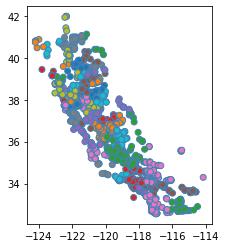

In [28]:
out.plot(column="COUNTY_NAME", facecolor="none", edgecolor="steelblue")

In [29]:
out.head()

,OBJECTID_1,CECPlantID,PlantName,EIAPlantID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,SolarThermal,Pumped_Storage,...,OBJECTID,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,GlobalID,SHAPE_Length,SHAPE_Area
0,1,B0001,Vaca Dixon Battery Storage,59256,0.0,1.0,0.0,0.0,0.0,0.0,...,48.0,Solano,SOL,48.0,48,095,None,{1EAB1C71-3B1D-4DD6-91DD-7ADCC5763BDE},2.775430,0.242547
1,2,B0002,Tehachapi Storage Project,59661,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,Kern,KER,15.0,15,029,None,{55F8678B-D6C9-40C4-B9A0-C3E73D2714A5},7.283520,2.096255
2,3,B0003,Yerba Buena Battery,59257,0.0,1.0,0.0,0.0,0.0,0.0,...,43.0,Santa Clara,SCL,43.0,43,085,None,{2220F7B9-9361-4FB8-9456-872109CF6CF7},3.544078,0.343197
3,4,B0004,Millikan Avenue BESS,60760,0.0,1.0,0.0,0.0,0.0,0.0,...,30.0,Orange,ORA,30.0,30,059,None,{E9A24C4D-A4EC-40B5-B689-89DE5354A669},2.158610,0.201290
4,5,B0005,Mira Loma BESS A,60661,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,San Bernardino,SBD,36.0,36,071,None,{E4DF6870-0D0B-40C1-AD3B-A60A72792CFD},10.455614,5.132310


In [30]:
out['geometry']

0       POINT (-121.92163 38.40010)
1       POINT (-118.38000 35.12333)
2       POINT (-121.75011 37.30723)
3       POINT (-117.83229 33.69101)
4       POINT (-117.55967 34.00465)
                   ...             
1846    POINT (-115.24110 33.68459)
1847    POINT (-115.24109 33.68459)
1848    POINT (-118.32539 34.98857)
1849    POINT (-121.12297 38.34443)
1850    POINT (-119.90745 36.22426)
Name: geometry, Length: 1851, dtype: geometry

In [20]:
out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1851 entries, 0 to 1850
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   index_left             1816 non-null   float64 
 1   OBJECTID               1816 non-null   float64 
 2   COUNTY_NAME            1816 non-null   object  
 3   COUNTY_ABBREV          1816 non-null   object  
 4   COUNTY_NUM             1816 non-null   float64 
 5   COUNTY_CODE            1816 non-null   object  
 6   COUNTY_FIPS            1816 non-null   object  
 7   ISLAND                 1 non-null      object  
 8   GlobalID               1816 non-null   object  
 9   SHAPE_Length           1816 non-null   float64 
 10  SHAPE_Area             1816 non-null   float64 
 11  OBJECTID_1             1851 non-null   int64   
 12  CECPlantID             1851 non-null   object  
 13  PlantName              1851 non-null   object  
 14  EIAPlantID             1850 non-